In [83]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('lasvegas.csv', encoding='UTF-8')

In [3]:
df.head()

,LVR,REF,INSUR,RATE,AMOUNT,CREDIT,TERM,ARM,DELINQUENT
0,80.0,0,1,6.355,1.5760,532,30,1,0
1,89.0,1,1,6.875,3.1595,703,30,1,0
2,80.0,1,1,7.080,1.7600,648,30,1,0
3,80.0,0,0,12.855,1.9680,599,30,1,1
4,70.0,1,0,5.760,1.8620,626,30,1,0


In [4]:
y = df['DELINQUENT']
X = df.drop('DELINQUENT',axis=1)

In [5]:
import statsmodels.api as sm

In [6]:
X_cons = sm.add_constant(X)

In [7]:
Logit = sm.Logit(y, X_cons).fit()
Logit.summary()

Optimization terminated successfully.
         Current function value: 0.333146
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             DELINQUENT   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                  0.3324
Time:                        11:04:38   Log-Likelihood:                -333.15
converged:                       True   LL-Null:                       -499.01
Covariance Type:            nonrobust   LLR p-value:                 7.145e-67
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6653      1.992      0.836      0.403      -2.239       5.570
LVR            0.0135      0.008      1.649      0.099      -0.003       0.030
REF           -0.5251      0.231     -2.278      0.023      -0.977      -0.073
INSUR         -3.1221      0.217    -14.393      0.000      -3.547      -2.697
RATE           0.3087      0.083      3.729      0.000       0.146       0.471
AMOUNT         0.2176      0.114      1.913      0.056      -0.005       0.441
CREDIT        -0.0036      0.002     -1.844      0.065      -0.007       0.000
TERM          -0.1330      0.035     -3.845      0.000      -0.201      -0.065
ARM            1.4056      0.371      3.785      0.000       0.678       2.134
==============================================================================
"""

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [9]:
train, test = train_test_split(df, test_size=0.4, random_state=131)
validation, test = train_test_split(test, test_size=0.5, random_state=211)

In [10]:
X = df.drop(['DELINQUENT'],axis=1)
y = df['DELINQUENT']
y_train = train['DELINQUENT']
X_train = train.drop(['DELINQUENT'],axis=1)
y_val = validation['DELINQUENT']
X_val = validation.drop(['DELINQUENT'], axis=1)
y_test = test['DELINQUENT']
X_test = test.drop(['DELINQUENT'],axis=1)

In [11]:
logit = LogisticRegression(fit_intercept=True, penalty='none', solver='newton-cg')
logit.fit(X_train,y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [12]:
print(logit.intercept_)
print(logit.coef_) 

[-0.75251942]
[[ 1.02332135e-02 -2.23491023e-01 -2.82577309e+00  3.57484784e-01
   1.98518041e-01 -1.53669704e-03 -1.06888274e-01  1.44429412e+00]]


In [13]:
# verification
X_cons = sm.add_constant(X_train)
ver = sm.Logit(y_train, X_cons).fit()
ver.summary()

Optimization terminated successfully.
         Current function value: 0.359529
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             DELINQUENT   No. Observations:                  600
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            8
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                  0.2848
Time:                        11:04:39   Log-Likelihood:                -215.72
converged:                       True   LL-Null:                       -301.62
Covariance Type:            nonrobust   LLR p-value:                 5.382e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7525      2.561     -0.294      0.769      -5.772       4.267
LVR            0.0102      0.010      0.985      0.325      -0.010       0.031
REF           -0.2235      0.299     -0.747      0.455      -0.810       0.363
INSUR         -2.8258      0.265    -10.651      0.000      -3.346      -2.306
RATE           0.3575      0.106      3.377      0.001       0.150       0.565
AMOUNT         0.1985      0.131      1.514      0.130      -0.058       0.455
CREDIT        -0.0015      0.002     -0.642      0.521      -0.006       0.003
TERM          -0.1069      0.044     -2.414      0.016      -0.194      -0.020
ARM            1.4443      0.504      2.868      0.004       0.457       2.431
==============================================================================
"""

In [14]:
X_val.head()

,LVR,REF,INSUR,RATE,AMOUNT,CREDIT,TERM,ARM
783,90.0,1,0,8.65,1.9800,651,30,1
682,69.2,1,1,5.35,2.9400,588,30,1
579,62.8,1,0,7.60,1.6000,696,30,0
254,90.0,0,1,7.00,3.3741,651,30,1
585,80.0,1,1,7.70,2.0000,616,30,1


In [15]:
result = pd.DataFrame(logit.predict_proba(X_val)[:,1], columns=['pred_prob']) # y=1일 확률만을 이용하여 사용해야 함.
result.head()

,pred_prob
0,0.660953
1,0.036849
2,0.171499
3,0.095536
4,0.072938


<AxesSubplot: ylabel='Frequency'>

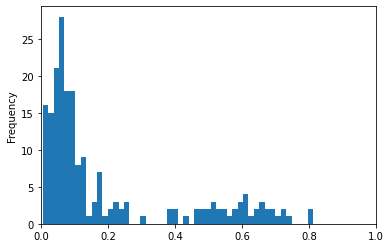

In [16]:
result.pred_prob.plot(kind='hist',bins=50, xlim=([0,1]))

In [74]:
# 1종오류: 귀무가설이 참인데, 기각하여 발생하는 오류: 실제로는 연체를 하지 않았는데, 모형이 연체한다고 예측한 것의 비율
# fpr = fp/(fp+tn): 모형은 연체한다고 예측했는데, 실제로는 안 그런 것 / 연체하지 않을 것으로 예측된 것.
# 2종오류: 귀무가설이 거짓인데, 기각하지 않았을 때 발생하는 오류: 실제로는 연체를 했는데, 이를 연체하지 않는다고 판단한 것.
# tpr = tp/(tp+fn): 실제로는 연체한 것 / 연체한 것으로 예측된 것.

fpr_logit,tpr_logit,thresholds_logit = roc_curve(validation.DELINQUENT, result.pred_prob)
roc_result = pd.DataFrame([fpr_logit,tpr_logit,thresholds_logit], index=['fpr_logit','tpr_logit','thresholds_logit']).T

In [96]:
roc_result['best'] = (1-roc_result['fpr_logit'])+(roc_result['tpr_logit']) # (1-fpr) + tpr => 제대로 분류되는 것의 비율을 maximize하는 것
roc_result.head()

,fpr_logit,tpr_logit,thresholds_logit,best,tp,fp,tn,fn,recall,precision,accuracy
0,0.000000,0.000000,1.813403,1.000000,0,0,159,41,0.000000,NaN,1.000000
1,0.000000,0.024390,0.813403,1.024390,1,0,159,40,0.024390,1.000000,1.000000
2,0.000000,0.073171,0.745286,1.073171,3,0,159,38,0.073171,1.000000,1.000000
3,0.006289,0.073171,0.720197,1.066881,3,1,158,38,0.073171,0.750000,0.987730
4,0.006289,0.121951,0.708179,1.115662,5,1,158,36,0.121951,0.833333,0.987879


In [76]:
thresholds_logit.shape[0]

46

In [84]:
for i in range(thresholds_logit.shape[0]):
    yhat_temp = np.where(result.pred_prob >= roc_result.thresholds_logit[i], 1, 0)
    yval_temp = y_val
    tn, fp, fn, tp = confusion_matrix(yval_temp, yhat_temp).ravel()
    roc_result['tp'][i] = tp
    roc_result['fp'][i] = fp
    roc_result['tn'][i] = tn
    roc_result['fn'][i] = fn

In [98]:
roc_result['precision'] = roc_result['tp']/(roc_result['tp']+roc_result['fp'])
roc_result['recall']= roc_result['tp']/(roc_result['tp']+roc_result['fn']) #tpr
roc_result['f1 score']=2*(roc_result['precision']*roc_result['recall']/(roc_result['precision']+roc_result['recall']))
#roc_result['accuracy'] = (roc_result['tp']+roc_result['tn'])/(roc_result['tp']+roc_result['tn']+roc_result['fp']+roc_result['fp'])
roc_result

,fpr_logit,tpr_logit,thresholds_logit,best,tp,fp,tn,fn,recall,precision,accuracy,f1 score
0,0.000000,0.000000,1.813403,1.000000,0,0,159,41,0.000000,NaN,1.000000,NaN
1,0.000000,0.024390,0.813403,1.024390,1,0,159,40,0.024390,1.000000,1.000000,0.047619
2,0.000000,0.073171,0.745286,1.073171,3,0,159,38,0.073171,1.000000,1.000000,0.136364
3,0.006289,0.073171,0.720197,1.066881,3,1,158,38,0.073171,0.750000,0.987730,0.133333
4,0.006289,0.121951,0.708179,1.115662,5,1,158,36,0.121951,0.833333,0.987879,0.212766
5,0.012579,0.121951,0.697048,1.109373,5,2,157,36,0.121951,0.714286,0.975904,0.208333
6,0.012579,0.195122,0.676701,1.182543,8,2,157,33,0.195122,0.800000,0.976331,0.313725
7,0.025157,0.195122,0.660953,1.169965,8,4,155,33,0.195122,0.666667,0.953216,0.301887
8,0.025157,0.341463,0.616061,1.316306,14,4,155,27,0.341463,0.777778,0.954802,0.474576
9,0.031447,0.341463,0.615162,1.310017,14,5,154,27,0.341463,0.736842,0.943820,0.466667


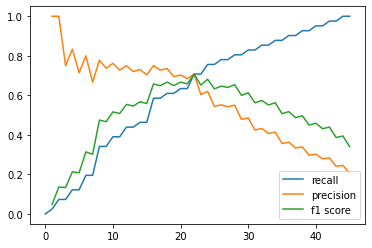

In [103]:
plt.plot(roc_result['recall'], label = 'recall')
plt.plot(roc_result['precision'], label = 'precision')
plt.plot(roc_result['f1 score'], label = 'f1 score')
plt.legend(loc="lower right")

plt.show()

In [ ]:
roc_result['best'] = (1-roc_result['fpr_logit'])+(roc_result['tpr_logit']) # (1-fpr) + tpr => 제대로 분류되는 것의 비율을 maximize하는 것
roc_result.head()

In [97]:
optimal_threshold_logit=roc_result.thresholds_logit[roc_result.best.idxmax()]
optimal_threshold_logit

0.2336975559145918

In [78]:
result['test_pred_prob']=logit.predict_proba(X_test)[:,1]
result.head()

,pred_prob,test_pred_prob,logit_binary
0,0.660953,0.585105,1
1,0.036849,0.153788,0
2,0.171499,0.067647,0
3,0.095536,0.566078,1
4,0.072938,0.069999,0


In [39]:
result['logit_binary']=np.where(result.test_pred_prob>=optimal_threshold_logit,1,0)

In [40]:
confusion = confusion_matrix(y_test, result.logit_binary)

In [41]:
tn, fp, fn, tp = confusion_matrix(y_test, result.logit_binary).ravel() #ravel은 1차원으로 만들어주는 함수를 의미함.
(tn, fp, fn, tp)

(145, 18, 3, 34)

In [42]:
tp/(tp+fn)

0.918918918918919

In [43]:
fp/(tn+fp)

0.11042944785276074

In [44]:
(tn+tp)/(tn+fp+fn+tp) # accuracy

0.895

In [45]:
fpr_logit,tpr_logit,thresholds_logit = roc_curve(test.DELINQUENT, result.test_pred_prob)
roc_result = pd.DataFrame([fpr_logit,tpr_logit,thresholds_logit], index=['fpr_logit','tpr_logit','thresholds_logit']).T

In [46]:
roc_auc_logit = auc(fpr_logit, tpr_logit)
roc_auc_logit

0.9162659592107446

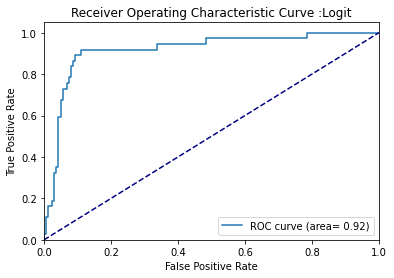

In [29]:
#lpm과 동일한 방법으로 AUROC 그리기

plt.figure()
plt.plot(fpr_logit, tpr_logit, label='ROC curve (area= %0.2f)' % roc_auc_logit)

##그래프에 직선 추가하기
plt.plot([0,1],[0,1],color='navy', linestyle='--')

#x축과 y축 구간 설정하기
plt.xlim([0,1])
plt.ylim([0,1.05])

#축 이름 및 그래프 타이틀, 레전드 추가하기
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve :Logit')
plt.legend(loc="lower right")

plt.show()